
# Stephen Re - Module 16 Project

In [8]:
#load modules
import pandas as pd
import json
import urllib.request
import pymysql
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import timedelta
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians

Use the code below to help you analyze the data returned by the MBTA API:

In [1]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 315,
                "carriages": [],
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 20,
                "direction_id": 0,
                "label": "1919",
                "latitude": 42.367854889,
                "longitude": -71.10776334,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "revenue": "REVENUE",
                "speed": null,
                "updated_at": "2024-09-22T17:34:27-04:00"
            },
            "id": "y1919",
            "links": {
                "self": "/vehicles/y1919"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "106",
                        "t

In [46]:
import json
import pandas as pd

# Load the JSON data from a file (assuming it's stored as 'data.json')
with open('data.json') as file:
    data = json.load(file)

# Prepare a list to store the rows
rows = []

# Iterate through each item in the "data" key
for i, item in enumerate(data['data']):
    attributes = item['attributes']
    relationships = item['relationships']
    
    # Extract the fields from the JSON structure
    record = {
        'bus_id': item['id'],
        'latitude': attributes.get('latitude'),
        'longitude': attributes.get('longitude'),
        'route_num': relationships['route']['data'].get('id'),
        'bearing': attributes.get('bearing'),
        'current_status': attributes.get('current_status'),
        'current_stop_sequence': attributes.get('current_stop_sequence'),
        'direction_id': attributes.get('direction_id'),
        'occupancy_status': attributes.get('occupancy_status'),
        'updated_at': attributes.get('updated_at'),
        'stop_id': relationships['stop']['data'].get('id'),
        'trip_id': relationships['trip']['data'].get('id')
    }
    
    # Append the extracted record to the rows list
    rows.append(record)

# Convert the list of rows to a pandas DataFrame
df = pd.DataFrame(rows)

# Display the DataFrame
df_sorted = df.sort_values(by='updated_at')
df_sorted


,record_num,bus_id,latitude,longitude,route_num,bearing,current_status,current_stop_sequence,direction_id,occupancy_status,updated_at,stop_id,trip_id
8,9,y1803,42.329850,-71.084080,1,225,STOPPED_AT,1,0,MANY_SEATS_AVAILABLE,2024-09-22T17:33:38-04:00,64,64394383
3,4,y1887,42.339390,-71.080560,1,135,STOPPED_AT,16,1,MANY_SEATS_AVAILABLE,2024-09-22T17:34:06-04:00,84,64395543
6,7,y1841,42.334604,-71.074765,1,0,STOPPED_AT,18,1,FEW_SEATS_AVAILABLE,2024-09-22T17:34:18-04:00,854,64395480
4,5,y1869,42.345808,-71.086977,1,0,IN_TRANSIT_TO,13,0,MANY_SEATS_AVAILABLE,2024-09-22T17:34:21-04:00,93,64394466
2,3,y1896,42.365720,-71.104260,1,135,IN_TRANSIT_TO,7,1,FEW_SEATS_AVAILABLE,2024-09-22T17:34:23-04:00,72,64394382
5,6,y1867,42.335877,-71.076387,1,140,IN_TRANSIT_TO,18,1,MANY_SEATS_AVAILABLE,2024-09-22T17:34:25-04:00,854,64394380
7,8,y1825,42.349619,-71.088887,1,0,STOPPED_AT,11,1,FULL,2024-09-22T17:34:25-04:00,77,64394381
1,2,y1900,42.367306,-71.106742,1,313,IN_TRANSIT_TO,20,0,FEW_SEATS_AVAILABLE,2024-09-22T17:34:26-04:00,106,64394401
0,1,y1919,42.367855,-71.107763,1,315,IN_TRANSIT_TO,20,0,MANY_SEATS_AVAILABLE,2024-09-22T17:34:27-04:00,106,64394446


In [48]:
df.dtypes

record_num                        int64
bus_id                           object
latitude                        float64
longitude                       float64
route_num                         int64
bearing                           int64
current_status                   object
current_stop_sequence             int64
direction_id                      int64
occupancy_status                 object
updated_at               datetime64[ns]
stop_id                           int64
trip_id                           int64
dtype: object

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [6]:
import os
import pymysql
import pandas as pd

host = 'localhost'
port = '3300'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3300),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)

C:\Users\steve\AppData\Local\Temp\ipykernel_35628\2754716137.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM mbta_buses",


,record_num,bus_id,latitude,longitude,route_num,bearing,current_status,current_stop_sequence,direction_id,occupancy_status,updated_at,stop_id,trip_id,created_at
41658,41659,y1816,42.359839,-71.094437,1,311,STOPPED_AT,15,0,MANY_SEATS_AVAILABLE,2024-09-26 19:16:42,97,64463464,2024-09-26 19:16:44
41659,41660,y1780,42.359671,-71.094223,1,323,STOPPED_AT,15,0,FULL,2024-09-26 19:16:40,97,64463461,2024-09-26 19:16:44
41660,41661,y3287,42.347604,-71.088106,1,0,STOPPED_AT,12,1,FULL,2024-09-26 19:16:37,79,64459589,2024-09-26 19:16:54
41661,41662,y1922,42.365819,-71.104295,1,113,IN_TRANSIT_TO,7,1,FEW_SEATS_AVAILABLE,2024-09-26 19:16:42,72,64463830,2024-09-26 19:16:54
41662,41663,y1909,42.329580,-71.083780,1,90,STOPPED_AT,1,0,MANY_SEATS_AVAILABLE,2024-09-26 19:16:16,64,64463469,2024-09-26 19:16:54
41663,41664,y1874,42.336370,-71.076690,1,315,STOPPED_AT,8,0,MANY_SEATS_AVAILABLE,2024-09-26 19:16:11,10590,64463468,2024-09-26 19:16:54
41664,41665,y1850,42.336252,-71.076693,1,133,STOPPED_AT,17,1,FEW_SEATS_AVAILABLE,2024-09-26 19:16:51,59,64463828,2024-09-26 19:16:54
41665,41666,y1818,42.355908,-71.091980,1,340,IN_TRANSIT_TO,15,0,MANY_SEATS_AVAILABLE,2024-09-26 19:16:50,97,64463463,2024-09-26 19:16:54
41666,41667,y1816,42.359870,-71.094511,1,0,IN_TRANSIT_TO,16,0,MANY_SEATS_AVAILABLE,2024-09-26 19:16:49,99,64463464,2024-09-26 19:16:54
41667,41668,y1780,42.359749,-71.094369,1,286,IN_TRANSIT_TO,16,0,FULL,2024-09-26 19:16:48,99,64463461,2024-09-26 19:16:54



The code below saves the data as a csv file to the local directory as a backup.

In [7]:

df.to_csv('mbta.csv')

In [2]:
'''

'''


import mysql.connector
import pandas as pd

# Connect to the database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",  
    port=3300, 
    password="MyNewPass",
    database="MBTAdb"
)

mycursor = mydb.cursor()

# find the min and max time of each trip_id and the difference between them in seconds
# find average of all of those trip times and return it in time format.
sqlstatement = '''
    WITH bustimes AS (
        SELECT DISTINCT
            trip_id,
            MIN(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at) AS mintime,
            MAX(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at DESC) AS maxtime,
            TIME_TO_SEC(TIMEDIFF(
                MAX(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at DESC),
                MIN(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at)
            )) AS diffstime
        FROM MBTAdb.mbta_buses
        ORDER BY trip_id
    )
    SELECT 
        SEC_TO_TIME(AVG(diffstime)) AS avgtime
    FROM bustimes;
'''

mycursor.execute(sqlstatement)

# convvert results into pandas dataframe
result = mycursor.fetchall()
columns = mycursor.column_names  # Get the column names
df = pd.DataFrame(result, columns=columns)

# connection cleanup
mycursor.close()
mydb.close()

# Display the DataFrame
print(df)


                 avgtime
0 0 days 00:46:59.654000


<h1>What is the average time it takes for a bus to complete the route</h1>
<h3>Answer: 46min 59sec</h3>

In [87]:
import mysql.connector
import pandas as pd

# Connect to the database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",  
    port=3300, 
    password="MyNewPass",
    database="MBTAdb"
)

mycursor = mydb.cursor()

# find the min and max time of each trip_id and the difference between them in seconds
# find average of all of those trip times and return it in time format.
sqlstatement = '''
    WITH bustimes AS (
        SELECT DISTINCT
            trip_id,
            MIN(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at) AS mintime,
            MAX(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at DESC) AS maxtime,
            TIME_TO_SEC(TIMEDIFF(
                MAX(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at DESC),
                MIN(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at)
            )) AS diffstime
        FROM MBTAdb.mbta_buses
        ORDER BY trip_id
    )
    SELECT 
        SEC_TO_TIME(AVG(diffstime)) AS avgtime
    FROM bustimes;
'''

mycursor.execute(sqlstatement)

# convvert results into pandas dataframe
result = mycursor.fetchall()
for row in result:
    print(row)
# columns = mycursor.column_names  # Get the column names
# df = pd.DataFrame(result, columns=columns)

# connection cleanup
mycursor.close()
mydb.close()

# Display the DataFrame
print(result)


(datetime.timedelta(seconds=2819, microseconds=654000),)
[(datetime.timedelta(seconds=2819, microseconds=654000),)]


In [76]:
import mysql.connector
import pandas as pd

# Connect to the database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",  
    port=3300, 
    password="MyNewPass",
    database="MBTAdb"
)

mycursor = mydb.cursor()

# find the min and max time of each trip_id and the difference between them in seconds
# find average of all of those trip times and return it in time format.
sqlstatement = '''
    WITH bustimes AS (
        SELECT DISTINCT
            bus_id,
            trip_id,
            current_stop_sequence,
            latitude,
            longitude,
            lag(latitude) over(partition by bus_id order by updated_at) as last_lat,
            lag(longitude) over(partition by bus_id order by updated_at) as last_long,
            updated_at,
            lag(updated_at) over(partition by bus_id order by updated_at) as last_update
        FROM MBTAdb.mbta_buses
    ),

    start_at_one as (
        SELECT DISTINCT
            trip_id,
            min(current_stop_sequence) as start_stop
        FROM MBTAdb.mbta_buses
        group by trip_id
    ),

    multiple_bus as (
        select 
            count(distinct bus_id) as bus_count,
            trip_id
        from bustimes
        group by trip_id
        order by bus_count desc
    )
    
    SELECT 
        b.*
    FROM multiple_bus b
    join start_at_one s on s.trip_id = b.trip_id
    where s.start_stop = 1
    order by bus_count desc
'''

mycursor.execute(sqlstatement)

# convvert results into pandas dataframe
result = mycursor.fetchall()
columns = mycursor.column_names  # Get the column names
df = pd.DataFrame(result, columns=columns)

# connection cleanup
mycursor.close()
mydb.close()

df

,bus_count,trip_id
0,2,64459123
1,2,64459154
2,2,64459184
3,2,64459540
4,2,64463391
...,...,...
150,1,64463853
151,1,64463855
152,1,64463859
153,1,64463860


# Provide a Visualization based on the data
#### Average Trip Time by Hour Trip Started
I wanted to see how the time of day the trip occured effects the trip time.  I took the average trip time by the hour of day the trip started.  I did this in order to have a reference for when the Trip started at current_stop_sequence = 1.
The results show an interesting pattern.  This seems to fit a pattern expected of a bus line that services mostly students instead of 9-5 worker traffic.  The traffic builds slowly over the day as kids get to school for later classes and peaks at 4 when most classes are done and kids are returning home.  The interesting pattern is that there is a peak at 2am.  That must correlate to bar close time, so it takes longer to load and unload people at each stop.  I hope it isnt because there are more cars clogging the roads at that time also.

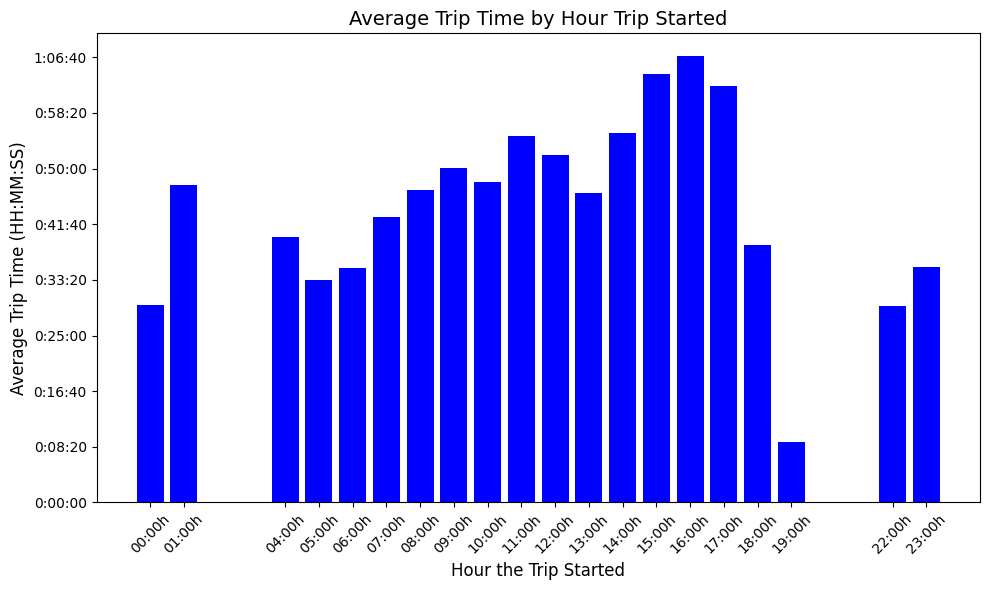

In [25]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import timedelta

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    port=3300,
    password="MyNewPass",
    database="MBTAdb"
)

mycursor = mydb.cursor()

#SQL query to calculate average time to complete a trip based on the hour the trip started.  
sqlstatement = '''
    WITH bustimes AS (
        SELECT DISTINCT
            trip_id,
            HOUR(MIN(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at)) AS beginhour,
            TIME_TO_SEC(TIMEDIFF(
                MAX(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at DESC),
                MIN(updated_at) OVER (PARTITION BY trip_id ORDER BY updated_at)
            )) AS diffstime
        FROM MBTAdb.mbta_buses
        ORDER BY trip_id
    )
    
    SELECT 
        beginhour,
        AVG(diffstime) AS avgtime
    FROM bustimes
    GROUP BY beginhour
    ORDER BY beginhour;
'''

mycursor.execute(sqlstatement)

result = mycursor.fetchall()
columns = mycursor.column_names

df = pd.DataFrame(result, columns=columns)

mycursor.close()
mydb.close()

#function to format seconds as HH:MM:SS for the y-axis
def seconds_to_time_format(x, pos):
    return str(timedelta(seconds=int(x)))

#function to format x-axis as HH:00h (e.g., 05:00h, 10:00h)
def hour_to_time_format(x, pos):
    return f'{int(x):02}:00h'

#creating the plot and labels
plt.figure(figsize=(10, 6))
plt.bar(df['beginhour'], df['avgtime'], color='blue')
plt.xlabel('Hour the Trip Started', fontsize=12)
plt.ylabel('Average Trip Time (HH:MM:SS)', fontsize=12)
plt.title('Average Trip Time by Hour Trip Started', fontsize=14)
plt.xticks(df['beginhour'], rotation=45)

#format the y-axis labels to show HH:MM:SS
y_formatter = FuncFormatter(seconds_to_time_format)
plt.gca().yaxis.set_major_formatter(y_formatter)

#format the x-axis labels to show HH:00h
x_formatter = FuncFormatter(hour_to_time_format)
plt.gca().xaxis.set_major_formatter(x_formatter)

plt.tight_layout()
plt.show()


# Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence.

#### Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

I made the assumption that any change in position less than 2 meters is GPS error so setting distance to 0 for those updates.  The rationale is that GPS locations are not exact and can jump around second to second which can show the bus moving when it isnt. This can cause the averaged speed over the entire trip to be artificially lower.

In [85]:
import mysql.connector
import pandas as pd
from datetime import timedelta


mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    port=3300,
    password="MyNewPass",
    database="MBTAdb"
)

mycursor = mydb.cursor()

#SQL query to return records for each updated_at to show current position and time and previous position and time.
#The query is filtered to only trips that start at current_stop_sequence = 1
#This is used in the next steop to calculate the speed of the bus during the previous time interval.
sqlstatement = '''
    WITH bustimes AS (
        SELECT DISTINCT
            bus_id,
            trip_id,
            current_stop_sequence,
            latitude,
            longitude,
            lag(latitude) over(partition by bus_id order by updated_at) as last_lat,
            lag(longitude) over(partition by bus_id order by updated_at) as last_long,
            updated_at,
            lag(updated_at) over(partition by bus_id order by updated_at) as last_update
        FROM MBTAdb.mbta_buses
    ),

    start_at_one as (
        SELECT DISTINCT
            trip_id,
            min(current_stop_sequence) as start_stop
        FROM MBTAdb.mbta_buses
        group by trip_id
    )
    
    SELECT 
        b.*
    FROM bustimes b
    join start_at_one s on b.trip_id = s.trip_id
    where s.start_stop = 1
    ORDER BY bus_id, updated_at;
'''

mycursor.execute(sqlstatement)

result = mycursor.fetchall()
columns = mycursor.column_names

df = pd.DataFrame(result, columns=columns)

mycursor.close()
mydb.close()

df['updated_at'] = pd.to_datetime(df['updated_at'])
df['last_update'] = pd.to_datetime(df['last_update'])

def calculate_haversine(lat1, lon1, lat2, lon2):
    if np.any(pd.isna([lat1, lon1, lat2, lon2])):
        return np.nan
    #convert latitude and longitude into radians
    loc1 = [radians(lat1), radians(lon1)]
    loc2 = [radians(lat2), radians(lon2)]
    #get the distance in radians
    result = haversine_distances([loc1, loc2])
    #convert to meters
    distance_in_meters = result[0][1] * 6371000
    #assuming that any change in position less than 2 meters is GPS error so setting distance to 0.
    #rationale is that gps locations are not exact and can jump around second to second which can show the bus moving when it isnt.
    #this can cause the averaged speed over the entire trip to be artificially lower.
    if distance_in_meters < 2:
        return 0
    return distance_in_meters

# Apply the haversine distance calculation row-wise
df['distance_meters'] = df.apply(
    lambda row: calculate_haversine(row['latitude'], row['longitude'], row['last_lat'], row['last_long']),
    axis=1
)

# Calculate the time difference in seconds
df['time_diff_seconds'] = (df['updated_at'] - df['last_update']).dt.total_seconds()

df['speed_kmh'] = df.apply(
    lambda row: (row['distance_meters'] / row['time_diff_seconds'] * 3.6) 
                if row['time_diff_seconds'] > 0 else 0, 
    axis=1  
)

# df.head(100)

# Calculate average speed including speed = 0
average_speed = df.groupby(['bus_id', 'trip_id'])['speed_kmh'].mean().reset_index()
average_speed.rename(columns={'speed_kmh': 'average_speed'}, inplace=True)

# Calculate average speed excluding speed = 0
average_speed_moving = df[df['speed_kmh'] > 0].groupby(['bus_id', 'trip_id'])['speed_kmh'].mean().reset_index()
average_speed_moving.rename(columns={'speed_kmh': 'average_speed_moving'}, inplace=True)

# Merge the results into a single DataFrame
average_speeds = pd.merge(average_speed, average_speed_moving, on=['bus_id', 'trip_id'], how='left')

average_speeds

,bus_id,trip_id,average_speed,average_speed_moving
0,y1744,64463416,13.283893,17.618045
1,y1744,64463436,10.080541,13.392023
2,y1744,64463457,7.698820,12.060220
3,y1744,64463808,9.432961,11.822096
4,y1744,64463822,9.479317,11.676795
...,...,...,...,...
157,y3287,64459589,8.796569,11.976867
158,y3295,64459184,10.325882,13.318891
159,y3295,64459210,8.854964,11.255643
160,y3295,64459575,8.450527,11.020896


In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'bus_id': ['y1744', 'y1744', 'y1744', 'y1744', 'y1744'],
    'latitude': [42.33902542, 42.33905442, 42.33907453, 42.33907496, 42.33907602],
    'longitude': [-71.05816955, -71.05740225, -71.05737090, -71.05736958, -71.05736864],
    'last_lat': [None, 42.33902542, 42.33905442, 42.33907453, 42.33907496],
    'last_long': [None, -71.05816955, -71.05740225, -71.05737090, -71.05736958],
    'updated_at': ['2024-09-26 13:52:13', '2024-09-26 13:52:22', '2024-09-26 13:52:39', '2024-09-26 13:52:41', '2024-09-26 13:52:55'],
    'last_update': [pd.NaT, '2024-09-26 13:52:13', '2024-09-26 13:52:22', '2024-09-26 13:52:39', '2024-09-26 13:52:41']
}

df = pd.DataFrame(data)

# Convert timestamps to datetime objects
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['last_update'] = pd.to_datetime(df['last_update'])

# Function to calculate haversine distance between two points
def calculate_haversine(lat1, lon1, lat2, lon2):
    if np.any(pd.isna([lat1, lon1, lat2, lon2])):
        return np.nan
    # Convert latitude and longitude from degrees to radians
    loc1 = [radians(lat1), radians(lon1)]
    loc2 = [radians(lat2), radians(lon2)]
    # Use scikit-learn's haversine_distances to get the distance in radians
    result = haversine_distances([loc1, loc2])
    # Multiply by Earth's radius to get distance in meters (Earth radius = 6371000 meters)
    distance_in_meters = result[0][1] * 6371000
    return distance_in_meters

# Apply the haversine distance calculation row-wise
df['distance_meters'] = df.apply(
    lambda row: calculate_haversine(row['latitude'], row['longitude'], row['last_lat'], row['last_long']),
    axis=1
)

# Calculate the time difference in seconds
df['time_diff_seconds'] = (df['updated_at'] - df['last_update']).dt.total_seconds()

df['speed_kmh'] = df.apply(
    lambda row: (row['distance_meters'] / row['time_diff_seconds'] * 3.6) 
                if row['time_diff_seconds'] > 0 else np.nan, 
    axis=1  
)

df
# # Display the updated DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Bus Positions with Distances and Time Differences", dataframe=df)


,bus_id,latitude,longitude,last_lat,last_long,updated_at,last_update,distance_meters,time_diff_seconds,speed_kmh
0,y1744,42.339025,-71.058170,NaN,NaN,2024-09-26 13:52:13,NaT,NaN,NaN,NaN
1,y1744,42.339054,-71.057402,42.339025,-71.058170,2024-09-26 13:52:22,2024-09-26 13:52:13,63.148473,9.0,25.259389
2,y1744,42.339075,-71.057371,42.339054,-71.057402,2024-09-26 13:52:39,2024-09-26 13:52:22,3.411713,17.0,0.722480
3,y1744,42.339075,-71.057370,42.339075,-71.057371,2024-09-26 13:52:41,2024-09-26 13:52:39,0.118562,2.0,0.213412
4,y1744,42.339076,-71.057369,42.339075,-71.057370,2024-09-26 13:52:55,2024-09-26 13:52:41,0.140932,14.0,0.036240
